In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

import pandas as pd
import numpy as np

from main import NER

In [2]:
ifile = "data/conll2003.test.conll"
ofile = "out/lstmout.txt"

ner = NER()

_, gold_labels = ner.extract_features_and_labels(ifile, simple=True)
features, out_labels = ner.extract_features_and_labels(ofile, simple=True)

tokens = [f['token'] for f in features]

df = pd.DataFrame({'token': tokens,'gold': gold_labels, 'predicted': out_labels})
# df.drop(df[df['gold'] == 'O'].index, inplace=True)

df = df.replace({'I-ORG': 'ORG', 
                 'B-ORG': 'ORG',
                 'I-PER': 'PER',
                 'B-PER': 'PER',
                 'I-LOC': 'LOC',
                 'B-LOC': 'LOC',
                 'I-MISC': 'MISC',
                 'B-MISC': 'MISC'})

df.head()

,token,gold,predicted
0,SOCCER,O,O
1,-,O,O
2,JAPAN,LOC,LOC
3,GET,O,O
4,LUCKY,O,O


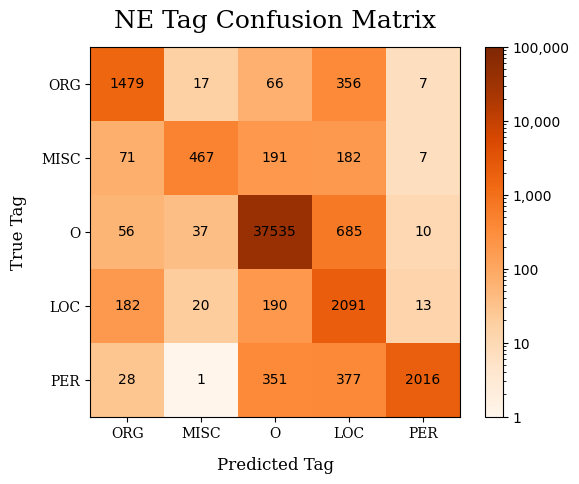

In [6]:
conf = confusion_matrix(df['gold'], df['predicted'])
labels = ["ORG", "MISC", "O", "LOC", "PER"]

fig, ax = plt.subplots()
a = ax.matshow(conf, cmap="Oranges", norm=colors.LogNorm(vmax=100000))
cbar = fig.colorbar(a,  ticks=np.arange(0,5))
cbar.set_ticks([1, 10, 100, 1000, 10000, 100000])
cbar.set_ticklabels(['1', '10', '100', '1,000', '10,000', '100,000'])

for i in range(5):
    for j in range(5):
        c = conf[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

ax.xaxis.set_ticks_position('bottom')
plt.xticks(range(0,5), labels, fontsize=10, fontname="serif")
plt.yticks(range(0,5), labels, fontsize=10, fontname="serif")
plt.xlabel('Predicted Tag', labelpad=12, fontdict={'fontsize': 12, "family": "serif"})
plt.ylabel('True Tag', labelpad=10, fontdict={'fontsize': 12, "family": "serif"})
plt.title('NE Tag Confusion Matrix', pad=14, fontdict={'fontsize': 18, "family": "serif"})
plt.show()

In [7]:
def eval_predictions(gold, predicted, labels):
    """Evaluates the predictions against the gold labels."""
    
    # Calculate the precision, recall and F1 score for each label
    recall = recall_score(gold, predicted, average=None)
    precision = precision_score(gold, predicted, average=None)
    f1 = f1_score(gold, predicted, average=None)

    # Create a dataframe with the scores
    scores = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1': f1}, index=labels)
    scores.index.name = 'Label'
    scores.loc['AVERAGE'] = scores.mean()
    
    return scores

eval_predictions(df['gold'], df['predicted'], labels)

,Precision,Recall,F1
Label,,,
ORG,0.814427,0.768312,0.790698
MISC,0.861624,0.508715,0.639726
O,0.979182,0.979438,0.979310
LOC,0.566513,0.837740,0.675933
PER,0.981978,0.727010,0.835475
AVERAGE,0.840745,0.764243,0.784228


W2V G300 
LR: 0.908438,0.879364,0.892753
SVM: 0.890396,0.851334,0.868930
TUNED: 0.886662,0.857275,0.870751 ???